# # CIFAR-10 CNN Classifier - Comprehensive Evaluation

# ## 1. Import Required Libraries

In [1]:
import torch
import torchvision
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import pandas as pd

# ## 2. Helper Functions for Visualization

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def plot_roc_auc(y_true, y_score, num_classes, classes):
    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
    fpr, tpr, roc_auc = {}, {}, {}

    plt.figure(figsize=(10, 8))
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_score[:, i])
        plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC={roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Each Class')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def plot_metric_bar(metrics_df, metric_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=metrics_df.index, y=metric_name, data=metrics_df)
    plt.title(f'{metric_name} per Class')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    for i, v in enumerate(metrics_df[metric_name]):
        plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
    plt.show()

def plot_training_history(train_losses, train_accuracies):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    ax1.plot(train_losses, label='Training Loss')
    ax1.set_title('Training Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    ax2.plot(train_accuracies, label='Training Accuracy')
    ax2.set_title('Training Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    
    plt.show()

# ## 3. CNN Model Definition

In [3]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(-1, 128 * 4 * 4)
        x = self.fc1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# ## 4. Data Loading and Transformation

In [4]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616])
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
classes = train_dataset.classes

# ## 5. Model Training

Epoch 1: 100%|██████████| 782/782 [01:35<00:00,  8.22it/s]


Epoch 1, Loss: 1.5507, Accuracy: 45.78%


Epoch 2: 100%|██████████| 782/782 [00:58<00:00, 13.47it/s]


Epoch 2, Loss: 1.1302, Accuracy: 59.79%


Epoch 3: 100%|██████████| 782/782 [00:56<00:00, 13.73it/s]


Epoch 3, Loss: 0.9871, Accuracy: 65.12%


Epoch 4: 100%|██████████| 782/782 [00:57<00:00, 13.57it/s]


Epoch 4, Loss: 0.8940, Accuracy: 68.42%


Epoch 5: 100%|██████████| 782/782 [01:02<00:00, 12.47it/s]


Epoch 5, Loss: 0.8297, Accuracy: 71.06%


Epoch 6: 100%|██████████| 782/782 [00:59<00:00, 13.17it/s]


Epoch 6, Loss: 0.7738, Accuracy: 72.89%


Epoch 7: 100%|██████████| 782/782 [00:58<00:00, 13.27it/s]


Epoch 7, Loss: 0.7303, Accuracy: 74.71%


Epoch 8: 100%|██████████| 782/782 [00:58<00:00, 13.32it/s]


Epoch 8, Loss: 0.7001, Accuracy: 75.68%


Epoch 9: 100%|██████████| 782/782 [01:12<00:00, 10.72it/s]


Epoch 9, Loss: 0.6768, Accuracy: 76.43%


Epoch 10: 100%|██████████| 782/782 [00:58<00:00, 13.35it/s]


Epoch 10, Loss: 0.6524, Accuracy: 77.41%


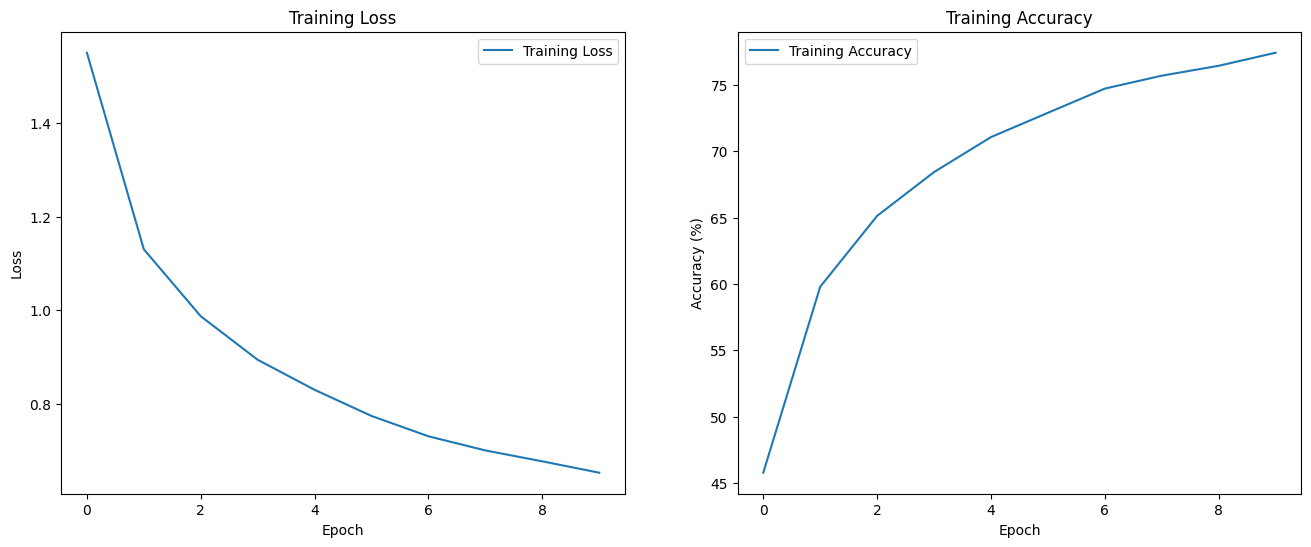

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_losses = []
train_accuracies = []

for epoch in range(10):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}'):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

    epoch_loss = total_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")
    # Plot training history
plot_training_history(train_losses, train_accuracies)

# ## 6. Model Evaluation

In [6]:
model.eval()
all_labels, all_preds, all_probs = [], [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        _, predicted = outputs.max(1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Classification report
report = classification_report(all_labels, all_preds, target_names=classes, digits=4, output_dict=True)
metrics_df = pd.DataFrame(report).transpose().iloc[:-3, :]

# ## 7. Confusion Matrix Visualization

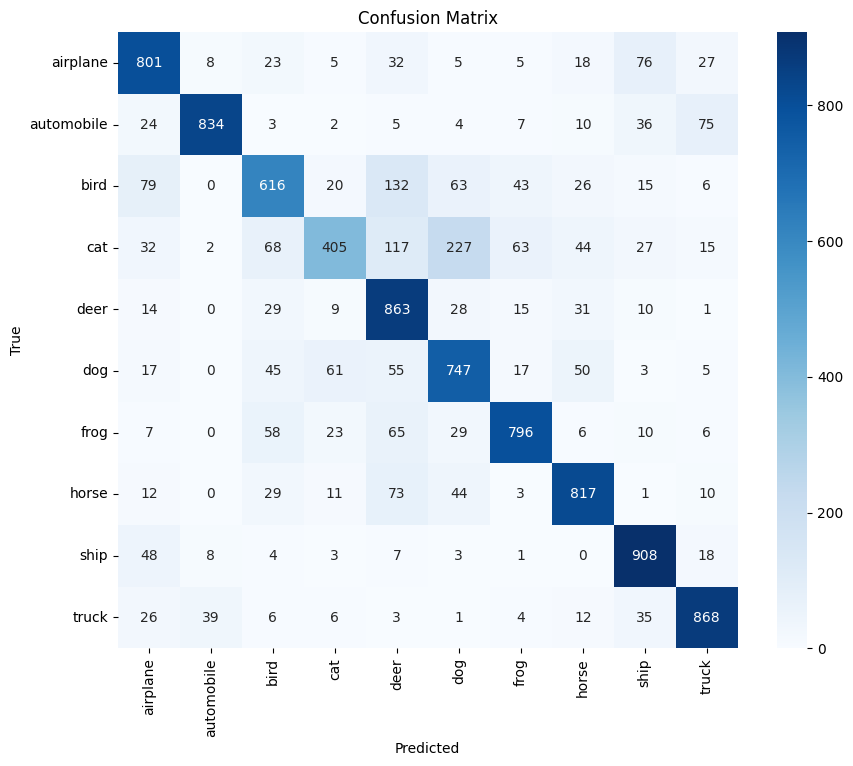

In [7]:
plot_confusion_matrix(all_labels, all_preds, classes)

# ## 8. Accuracy Visualization

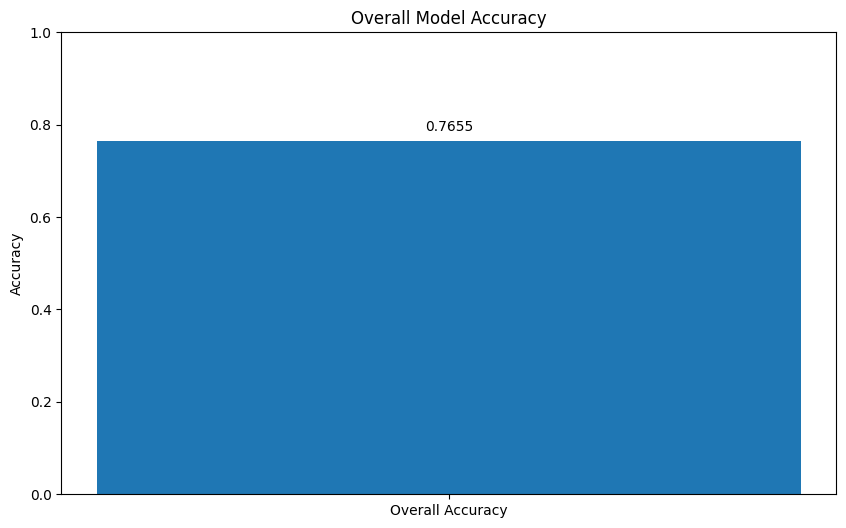

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(['Overall Accuracy'], [report['accuracy']])
plt.ylim(0, 1)
plt.title('Overall Model Accuracy')
plt.ylabel('Accuracy')
for i, v in enumerate([report['accuracy']]):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')
plt.show()

# ## 9. Precision Visualization

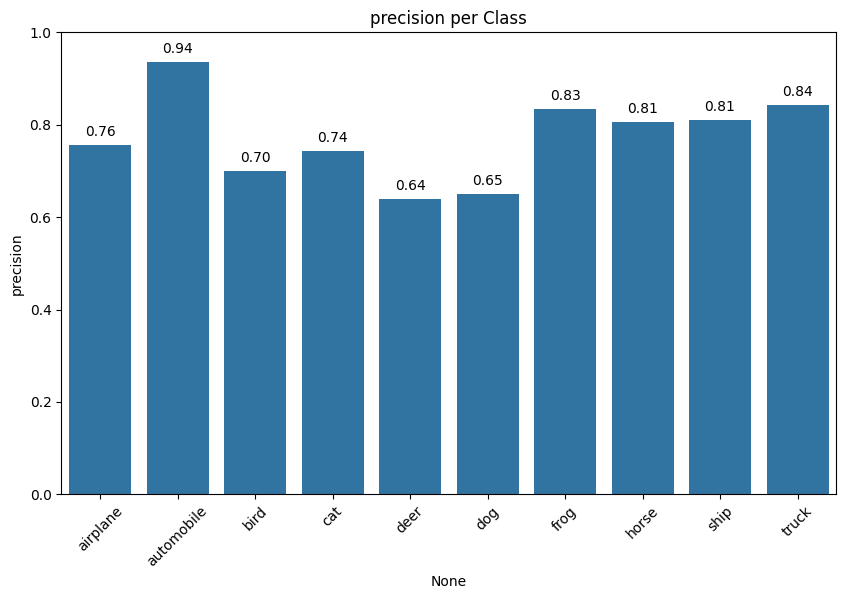

In [9]:
plot_metric_bar(metrics_df, 'precision')

# ## 10. Recall (Sensitivity) Visualization

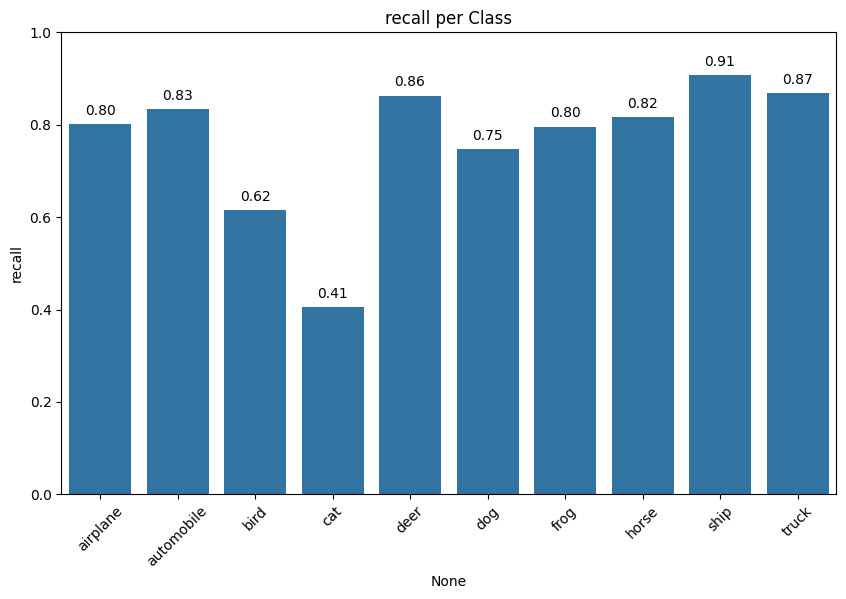

In [10]:
plot_metric_bar(metrics_df, 'recall')

# ## 11. F1-Score Visualization

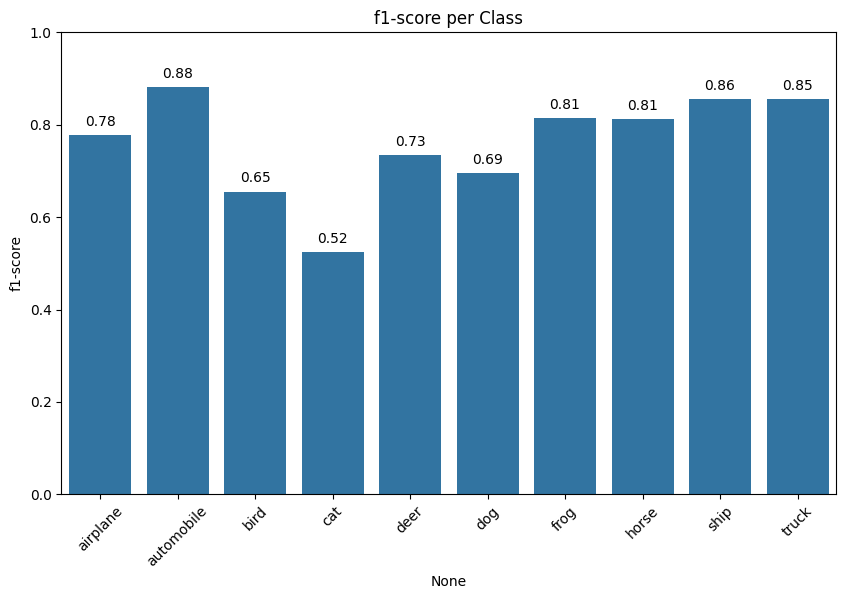

In [11]:
plot_metric_bar(metrics_df, 'f1-score')

# ## 12. Support Visualization

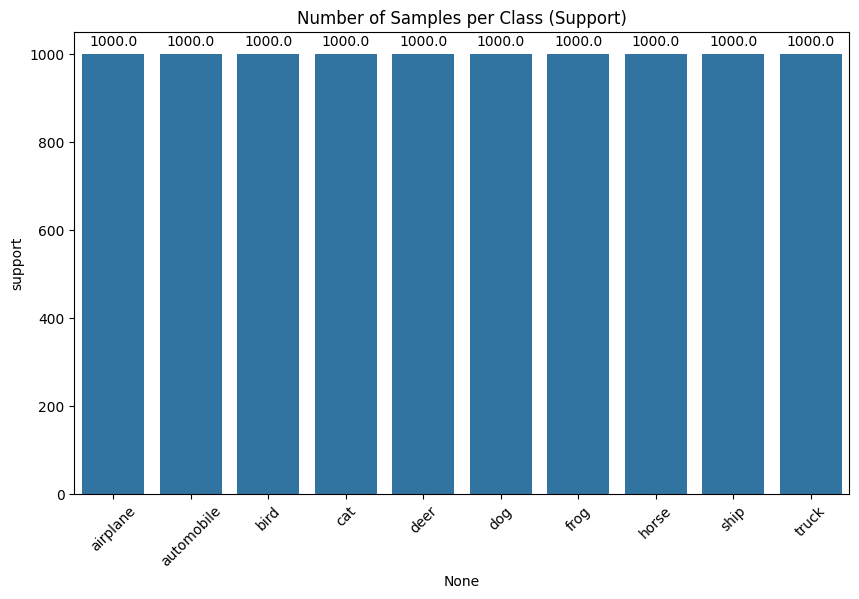

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y='support', data=metrics_df)
plt.title('Number of Samples per Class (Support)')
plt.xticks(rotation=45)
for i, v in enumerate(metrics_df['support']):
    plt.text(i, v + 20, str(v), ha='center')
plt.show()

# ## 13. ROC Curve & AUC Scores

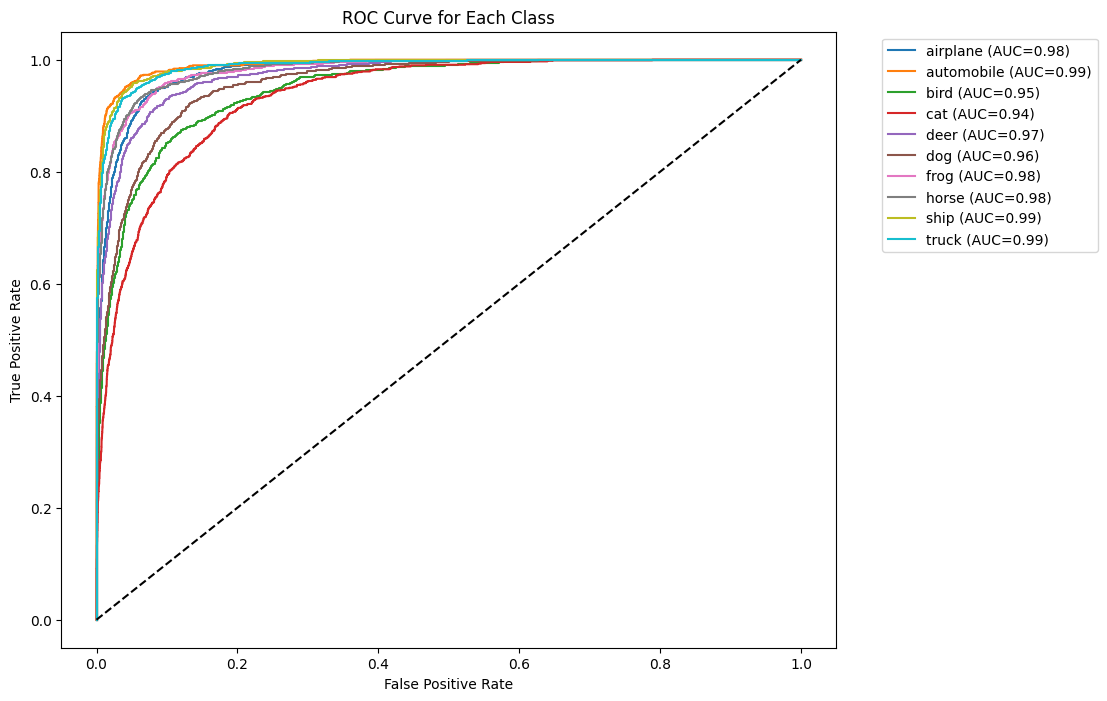

In [13]:
plot_roc_auc(all_labels, np.array(all_probs), num_classes=10, classes=classes)

# ## 14. Detailed Classification Report

In [14]:
print(classification_report(all_labels, all_preds, target_names=classes, digits=4))

              precision    recall  f1-score   support

    airplane     0.7557    0.8010    0.7777      1000
  automobile     0.9360    0.8340    0.8821      1000
        bird     0.6992    0.6160    0.6550      1000
         cat     0.7431    0.4050    0.5243      1000
        deer     0.6383    0.8630    0.7338      1000
         dog     0.6490    0.7470    0.6946      1000
        frog     0.8344    0.7960    0.8147      1000
       horse     0.8057    0.8170    0.8113      1000
        ship     0.8100    0.9080    0.8562      1000
       truck     0.8419    0.8680    0.8548      1000

    accuracy                         0.7655     10000
   macro avg     0.7713    0.7655    0.7604     10000
weighted avg     0.7713    0.7655    0.7604     10000



## 15. Per-Class Metrics Summary

In [15]:
# Compute TP, FP, FN, TN per class
num_classes = len(classes)
tp = np.zeros(num_classes)
fp = np.zeros(num_classes)
fn = np.zeros(num_classes)
tn = np.zeros(num_classes)

y_true = np.array(all_labels)
y_pred = np.array(all_preds)

for i in range(num_classes):
    tp[i] = np.sum((y_pred == i) & (y_true == i))
    fp[i] = np.sum((y_pred == i) & (y_true != i))
    fn[i] = np.sum((y_pred != i) & (y_true == i))
    tn[i] = np.sum((y_pred != i) & (y_true != i))

# Calculate metrics
precision = tp / (tp + fp + 1e-10)
recall = tp / (tp + fn + 1e-10)  # aka sensitivity
specificity = tn / (tn + fp + 1e-10)
accuracy = (tp + tn) / (tp + tn + fp + fn + 1e-10)
f1 = 2 * precision * recall / (precision + recall + 1e-10)

# Print per-class metrics
print("\nPer-class metrics:")
for i, cls in enumerate(classes):
    print(
        f"  {cls:10s}  Acc: {accuracy[i]:.4f}  "
        f"Sens: {recall[i]:.4f}  Spec: {specificity[i]:.4f}  "
        f"Prec: {precision[i]:.4f}  F1: {f1[i]:.4f}"
    )



Per-class metrics:
  airplane    Acc: 0.9542  Sens: 0.8010  Spec: 0.9712  Prec: 0.7557  F1: 0.7777
  automobile  Acc: 0.9777  Sens: 0.8340  Spec: 0.9937  Prec: 0.9360  F1: 0.8821
  bird        Acc: 0.9351  Sens: 0.6160  Spec: 0.9706  Prec: 0.6992  F1: 0.6550
  cat         Acc: 0.9265  Sens: 0.4050  Spec: 0.9844  Prec: 0.7431  F1: 0.5243
  deer        Acc: 0.9374  Sens: 0.8630  Spec: 0.9457  Prec: 0.6383  F1: 0.7338
  dog         Acc: 0.9343  Sens: 0.7470  Spec: 0.9551  Prec: 0.6490  F1: 0.6946
  frog        Acc: 0.9638  Sens: 0.7960  Spec: 0.9824  Prec: 0.8344  F1: 0.8147
  horse       Acc: 0.9620  Sens: 0.8170  Spec: 0.9781  Prec: 0.8057  F1: 0.8113
  ship        Acc: 0.9695  Sens: 0.9080  Spec: 0.9763  Prec: 0.8100  F1: 0.8562
  truck       Acc: 0.9705  Sens: 0.8680  Spec: 0.9819  Prec: 0.8419  F1: 0.8548
